<a href="https://colab.research.google.com/github/njanrepo/MLEProject/blob/main/ML_Proj_stock_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [18]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# New Section

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

In [3]:
!pip install yfinance scikit-learn statsmodels seaborn

     |████████████████████████████████| 6.3 MB 5.4 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [4]:
import yfinance as yf

In [5]:
def get_sp500_list():
  payload=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
  first_table = payload[0]
  sp500df = first_table
  sp500_list = sp500df.Symbol.values.tolist()
  return sp500_list

In [6]:
df=yf.download(tickers=get_sp500_list(), period='1d')

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BF.B: No data found for this date range, symbol may be delisted
- BRK.B: No data found, symbol may be delisted


In [66]:
symbol='TSLA'
df= yf.download(symbol, period='6mo', )

[*********************100%***********************]  1 of 1 completed


In [67]:
df.shape

(129, 6)

In [68]:
pd.set_option('display.float_format', '{:20,.2f}'.format)

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,129.00,752.17,156.92,552.55,651.99,710.68,784.80,"1,234.41"
High,129.00,766.92,164.26,566.21,662.17,716.97,796.38,"1,243.49"
Low,129.00,740.42,151.70,546.98,639.40,702.10,774.20,"1,217.00"
Close,129.00,754.87,159.12,563.46,650.60,709.99,781.53,"1,229.91"
Adj Close,129.00,754.87,159.12,563.46,650.60,709.99,781.53,"1,229.91"
Volume,129.00,"23,236,800.51","9,828,189.10","9,800,600.00","16,371,000.00","21,373,000.00","26,542,400.00","62,852,100.00"


In [69]:
df.nunique()

Open         129
High         129
Low          129
Close        129
Adj Close    129
Volume       129
dtype: int64

In [70]:
df.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [71]:
df.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [72]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ', '_')

In [73]:
df.head(10)

,open,high,low,close,adj_close,volume
Date,,,,,,
2021-05-18,568.00,596.25,563.38,577.87,577.87,36830600
2021-05-19,552.55,566.21,546.98,563.46,563.46,39578400
2021-05-20,575.00,588.85,571.07,586.78,586.78,30821100
2021-05-21,596.11,596.68,580.00,580.88,580.88,26030600
2021-05-24,581.60,614.48,573.65,606.44,606.44,34558100
2021-05-25,607.31,613.99,595.71,604.69,604.69,28005900
2021-05-26,607.56,626.17,601.50,619.13,619.13,28639300
2021-05-27,620.24,631.13,616.21,630.85,630.85,26370600
2021-05-28,628.50,635.59,622.38,625.22,625.22,22737000


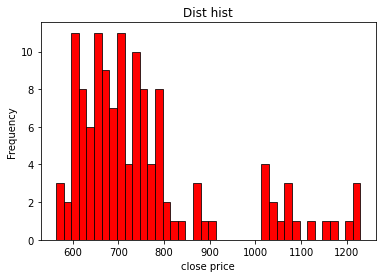

In [74]:
plt.figure(figsize=(6,4))
sns.histplot(df.close, bins=40, color='red', alpha=1)
plt.ylabel("Frequency")
plt.xlabel('close price')
plt.title('Dist hist')
plt.show()

In [75]:
def make_X_and_Y(close_prices, period=6):
  X = []
  y = []
  for i in range(len(close_prices)- period):
    X.append(close_prices[i:i+period])
    y.append(close_prices[i+period])
  return X,y

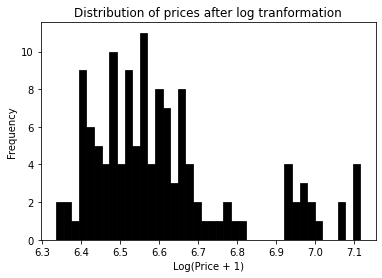

In [76]:
log_price = np.log1p(df.close)

plt.figure(figsize=(6, 4))

sns.histplot(log_price, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Distribution of prices after log tranformation')

plt.show()

In [77]:
from sklearn.model_selection import train_test_split
X,y=make_X_and_Y(list(df.close))
dfr = pd.DataFrame({'actual': X, 'predicted': y})

train, test= train_test_split(dfr,test_size=0.15 , shuffle=False,random_state = 0)
train_x = train['actual'].to_list()
train_y = train['predicted'].to_list()
test_x = train['actual'].to_list()
test_y = train['predicted'].to_list()

print(train.shape)
print(test.shape)

(104, 2)
(19, 2)


In [78]:
print((train_x))
print((test_x))
print((train_y))
print((test_y))

[[577.8699951171875, 563.4600219726562, 586.780029296875, 580.8800048828125, 606.4400024414062, 604.6900024414062], [563.4600219726562, 586.780029296875, 580.8800048828125, 606.4400024414062, 604.6900024414062, 619.1300048828125], [586.780029296875, 580.8800048828125, 606.4400024414062, 604.6900024414062, 619.1300048828125, 630.8499755859375], [580.8800048828125, 606.4400024414062, 604.6900024414062, 619.1300048828125, 630.8499755859375, 625.219970703125], [606.4400024414062, 604.6900024414062, 619.1300048828125, 630.8499755859375, 625.219970703125, 623.9000244140625], [604.6900024414062, 619.1300048828125, 630.8499755859375, 625.219970703125, 623.9000244140625, 605.1199951171875], [619.1300048828125, 630.8499755859375, 625.219970703125, 623.9000244140625, 605.1199951171875, 572.8400268554688], [630.8499755859375, 625.219970703125, 623.9000244140625, 605.1199951171875, 572.8400268554688, 599.0499877929688], [625.219970703125, 623.9000244140625, 605.1199951171875, 572.8400268554688, 599

In [79]:
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor


In [83]:
def return_model(X, y):
  clf = DecisionTreeRegressor()
  clf.fit(X,y)
  return clf
period = 6
latest_feat = np.array(list(df.close)[-period:]).reshape((1,-1))
classifier = return_model(train_x,train_y)
pred_y = classifier.predict(test_x)
print(classifier.score(test_x, test_y))
dfr = pd.DataFrame({'actual': test_y, 'predicted': pred_y})
dfr

1.0


,actual,predicted
0,619.13,619.13
1,630.85,630.85
2,625.22,625.22
3,623.90,623.90
4,605.12,605.12
...,...,...
99,843.03,843.03
100,870.11,870.11
101,864.27,864.27
102,865.80,865.80


No handles with labels found to put in legend.


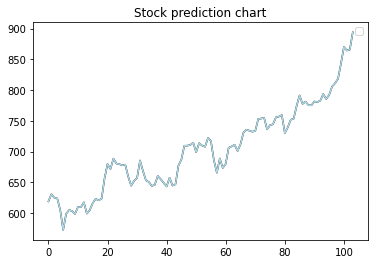

In [81]:
plt.plot(dfr.actual, color='black')
plt.plot(dfr.predicted, color='lightblue')
plt.title("Stock prediction chart")
plt.legend();


In [61]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from time import time
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [62]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]

In [63]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(train_x,train_y)
    train_time = time() - start
    start = time()
    y_pred = model.predict(test_x)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(test_y, y_pred))
    print("\tMean absolute error:", mean_absolute_error(test_y, y_pred))
    print("\tR2 score:", r2_score(test_y, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.001s
	Prediction time: 0.002s
	Explained variance: 0.9216651371783298
	Mean absolute error: 20.37178297776439
	R2 score: 0.9208678339584747

GradientBoostingRegressor()
	Training time: 0.041s
	Prediction time: 0.001s
	Explained variance: 0.997337055480233
	Mean absolute error: 4.110050715749489
	R2 score: 0.997337055480233

ExtraTreesRegressor()
	Training time: 0.102s
	Prediction time: 0.011s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0

RandomForestRegressor()
	Training time: 0.144s
	Prediction time: 0.018s
	Explained variance: 0.9867466643602376
	Mean absolute error: 8.99185589130106
	R2 score: 0.986638180396692

DecisionTreeRegressor()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained variance: 1.0
	Mean absolute error: 0.0
	R2 score: 1.0

LinearRegression()
	Training time: 0.001s
	Prediction time: 0.000s
	Explained variance: 0.9224087853070375
	Mean absolute error: 21.818233222292136
	R2 score: 0.9224087853070375